In [1]:
import numpy as np
import pandas as pd
import xarray as xr
from matplotlib import pyplot as plt
import sys
sys.path.append('/home/z3526974/Work/code/Shelf_moorings/pssa')
from mySSA import mySSA
%matplotlib inline

plt.rcParams['figure.figsize'] = (12,8)

In [2]:
datapath = '/home/z3526974/Work/data/Shelf_moorings/Gridded_timeseries/'
ch100 = xr.open_dataset(datapath + 'IMOS_ANMN-NSW_TZ_20090815_CH100_FV02_TEMP-gridded-timeseries_END-20190522_C-20200108.nc')
bmp120 = xr.open_dataset(datapath + 'IMOS_ANMN-NSW_TZ_20110329_BMP120_FV02_TEMP-gridded-timeseries_END-20190724_C-20200108.nc')

ch100.TEMP

<xarray.DataArray 'TEMP' (TIME: 83785, DEPTH: 21)>
[1759485 values with dtype=float64]
Coordinates:
  * DEPTH    (DEPTH) float64 0.0 5.0 10.0 15.0 20.0 ... 85.0 90.0 95.0 100.0
  * TIME     (TIME) datetime64[ns] 2009-08-15T01:00:00 ... 2019-05-22
Attributes:
    long_name:      sea_water_temperature
    standard_name:  sea_water_temperature
    units:          degrees_Celsius
    valid_max:      40.0
    valid_min:      -2.5

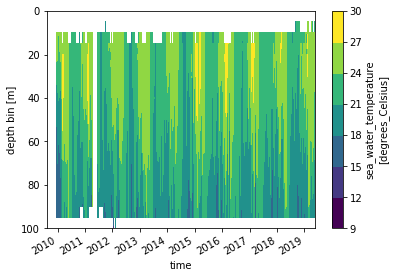

In [3]:
ch100.TEMP.plot.contourf(x = 'TIME',yincrease=False)

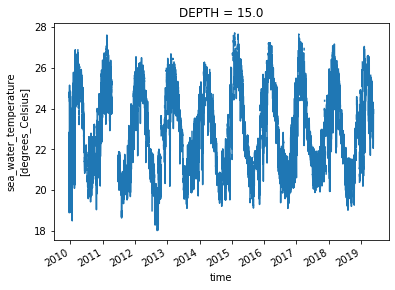

In [4]:
ch100.TEMP.sel(DEPTH=15).plot(x = 'TIME')

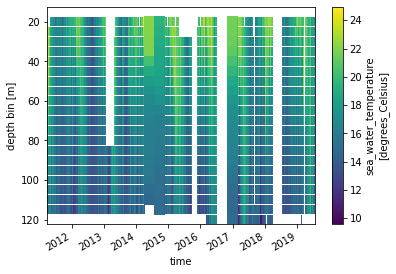

In [5]:
bmp120.TEMP.plot(x = 'TIME',yincrease=False)

## Now let'ssave it as a simple ascii for gapfilling using SSA_MTM command line toolkit from UCLA

In [6]:
surface = ch100.TEMP.sel(DEPTH=15).values
np.savetxt('ch100_15m_temp.dat', surface)
BMP_surface = bmp120.TEMP.sel(DEPTH=20).values
np.savetxt('bmp120_15m_temp.dat', surface)

Text(0.5, 1.0, 'BMP120 @20m')

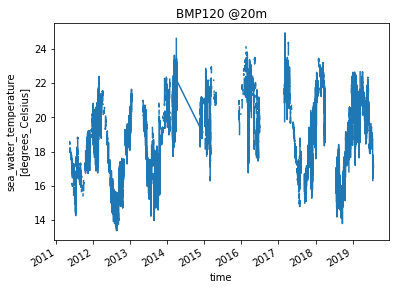

In [7]:
bmp120.TEMP.sel(DEPTH=20).plot()
plt.title('BMP120 @20m')